In [114]:
import torch
import torch.nn as nn
from torchviz import make_dot



In [119]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

c = a * x
y_hat = c + b
z = y_hat - y
L = z**2

make_dot(L)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [28]:
L.backward()

In [29]:
a.grad
b.grad

tensor([-10.])

In [30]:
class MySquare(torch.autograd.Function):
    
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input**2
    
    @staticmethod
    def backward(ctx, grad_output):
        input,  = ctx.saved_tensors
        return 2 * input * grad_output

my_square = MySquare.apply


x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = my_square(z)
L.backward()

In [31]:
a.grad

tensor([-30.])

In [32]:
import pandas as pd

In [107]:
data = pd.read_csv("data_linear.csv").values
X = torch.tensor(data[:, 0], dtype=torch.float64) / 50
y = torch.tensor(data[:, 1], dtype=torch.float64) /1000

class LinearRegression:
    def __init__(self, learning_rate = .01, max_iterations = 1000):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        self.a = None
        self.b = None
        
    def model(self, x):
        return self.a * x + self.b
    
    def error(self, y_hat, y):
        squared_diffs = (y_hat - y)**2
        return squared_diffs.mean()

    
    def fit(self, x, y):
        self.a = torch.tensor(0.5, requires_grad = True, dtype=torch.float64)
        self.b = torch.tensor(0.5, requires_grad = True, dtype=torch.float64)
        
        for ite in range(1, self.max_iterations + 1):
        # nếu có grad ở tham số a, b thì zero đi, tránh trường hợp cộng dồn grad
            if self.a.grad is not None:
                self.a.grad.zero_()
            if self.b.grad is not None:
                self.b.grad.zero_()
        
            # xây model, loss
            y_hat = self.model(x)
            loss = self.error(y_hat, y)

            # gọi backward để tính đạo hàm ngược của loss với tham số a, b
            loss.backward()

            # update a,b bằng thuật toán gradient descent, để torch.no_grad thì mình không cần backward ở bước này
            with torch.no_grad():
                self.a -= self.lr * self.a.grad
                self.b -= self.lr * self.b.grad
            print(f"Epoch {ite}, loss metrics {loss}")       
            
    def predict(self, X):
        return self.a * X + self.b

In [108]:
lm = LinearRegression()

In [109]:
lm.fit(X, y)


Epoch 1, loss metrics 0.04043930522283332
Epoch 2, loss metrics 0.03816775853251434
Epoch 3, loss metrics 0.03613844913175328
Epoch 4, loss metrics 0.034324998206793716
Epoch 5, loss metrics 0.03270390089772107
Epoch 6, loss metrics 0.03125421317967716
Epoch 7, loss metrics 0.029957272858539934
Epoch 8, loss metrics 0.028796450964278807
Epoch 9, loss metrics 0.027756930230141506
Epoch 10, loss metrics 0.02682550770665648
Epoch 11, loss metrics 0.02599041888094904
Epoch 12, loss metrics 0.025241180958355446
Epoch 13, loss metrics 0.024568453218591947
Epoch 14, loss metrics 0.02396391258619657
Epoch 15, loss metrics 0.023420142757640133
Epoch 16, loss metrics 0.022930535408099823
Epoch 17, loss metrics 0.02248920216180955
Epoch 18, loss metrics 0.02209089615328917
Epoch 19, loss metrics 0.021730942134521213
Epoch 20, loss metrics 0.02140517419698936
Epoch 21, loss metrics 0.02110988027893509
Epoch 22, loss metrics 0.020841752718579406
Epoch 23, loss metrics 0.020597844194598272
Epoch 24,

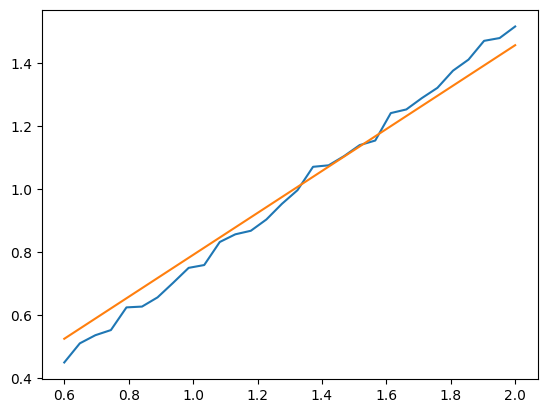

In [110]:
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.plot(X, lm.predict(X).detach().numpy())

In [111]:
lm.a

tensor(0.6658, dtype=torch.float64, requires_grad=True)

In [112]:
X

tensor([0.6000, 0.6483, 0.6966, 0.7448, 0.7931, 0.8414, 0.8897, 0.9379, 0.9862,
        1.0345, 1.0828, 1.1310, 1.1793, 1.2276, 1.2759, 1.3241, 1.3724, 1.4207,
        1.4690, 1.5172, 1.5655, 1.6138, 1.6621, 1.7103, 1.7586, 1.8069, 1.8552,
        1.9034, 1.9517, 2.0000], dtype=torch.float64)